# ARIMA Exercise

Roadmap for ARIMA analysis

### 1. Download dataset from Kaggle

In [2]:
import os
import zipfile
import pandas as pd

initial_working_directory = os.getcwd()

kaggle_dataset = "altruistdelhite04/gold-price-data"

kaggle_json_path = 'G:\\My Drive\\pyProjs\\pyTimeSeriesDataAnalysis\\kaggle'

os.environ['KAGGLE_CONFIG_DIR'] = kaggle_json_path

target_dir = f'C:\\Users\\fmiranda\\Documents\\Kaggle\\{kaggle_dataset}'

if not os.path.exists(target_dir):
    os.makedirs(target_dir)

os.chdir(target_dir)

In [3]:
!kaggle datasets download -d {kaggle_dataset}

gold-price-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
dataset_filename = kaggle_dataset.split('/')[-1]

with zipfile.ZipFile(f'{dataset_filename}.zip', 'r') as zip_ref:
    zip_ref.extractall()

### 2. Load dataset

In [5]:
df = pd.read_csv('gld_price_data.csv')

In [6]:
os.chdir(initial_working_directory)

### 3. Import needed libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

### 3. Check dataset

In [8]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
y = df['GLD']

In [12]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime

df.set_index('Date', inplace=True)

df = df.asfreq('B')

In [13]:
df.index

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
               '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11',
               '2008-01-14', '2008-01-15',
               ...
               '2018-05-03', '2018-05-04', '2018-05-07', '2018-05-08',
               '2018-05-09', '2018-05-10', '2018-05-11', '2018-05-14',
               '2018-05-15', '2018-05-16'],
              dtype='datetime64[ns]', name='Date', length=2706, freq='B')

In [14]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD
Date,,,,,
2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


### 4. Data cleaning

In [15]:
df.isna().sum()

SPX        416
GLD        416
USO        416
SLV        416
EUR/USD    416
dtype: int64

In [16]:
df = df.fillna(method='ffill')

In [17]:
df.isna().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### 5. Exploratory Data Analysis

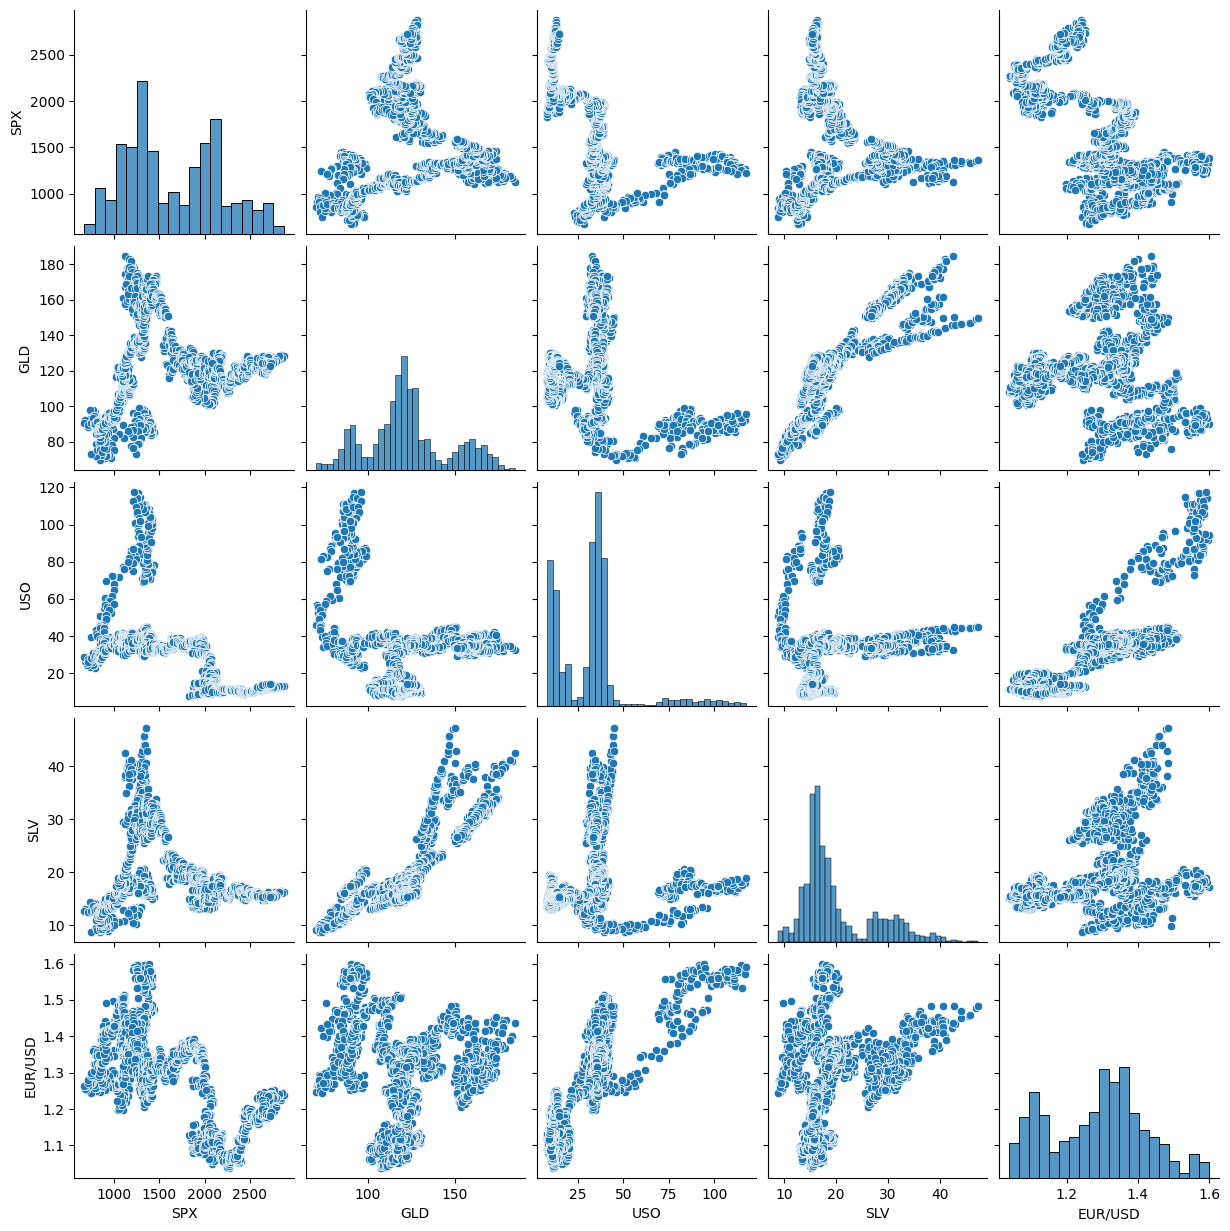

In [18]:
sns.pairplot(df)

<Axes: xlabel='Date', ylabel='GLD'>

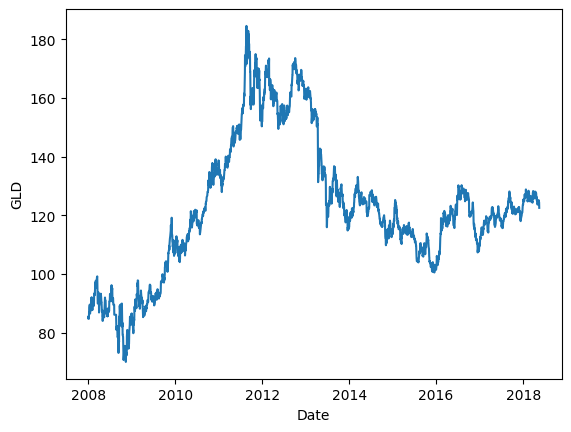

In [19]:
y = df['GLD']

sns.lineplot(x=df.index, y=y, data=df)

<Axes: xlabel='GLD', ylabel='Count'>

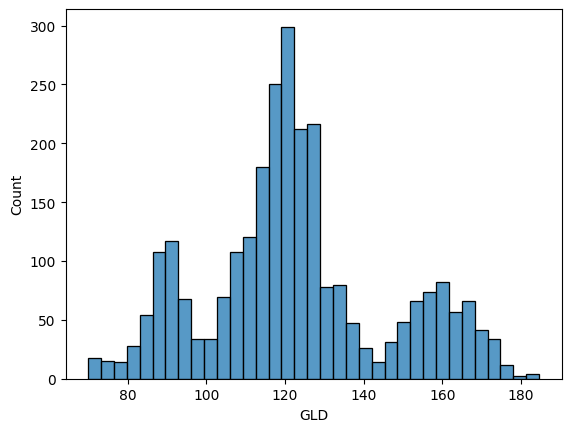

In [20]:
sns.histplot(y)

<Axes: xlabel='GLD', ylabel='Density'>

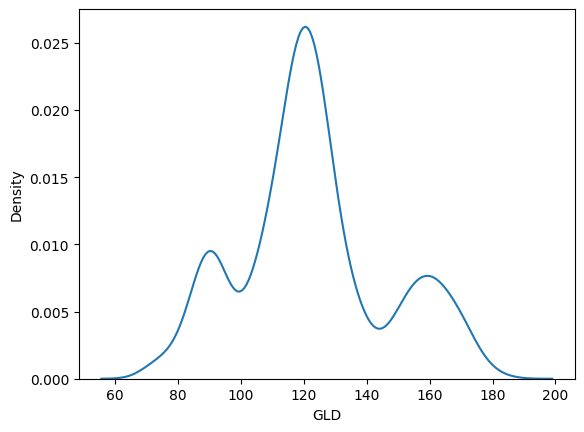

In [21]:
sns.kdeplot(y)

<Axes: xlabel='Date', ylabel='GLD'>

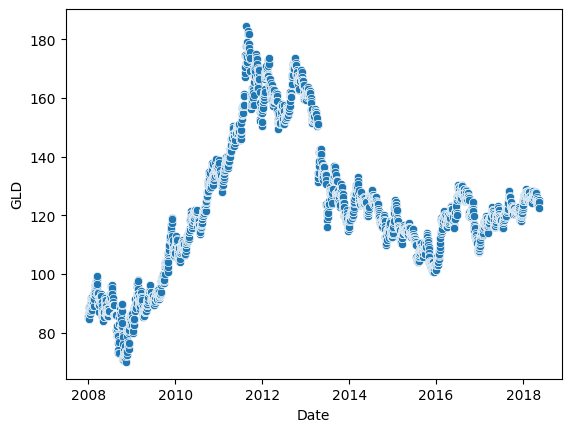

In [22]:
sns.scatterplot(x=df.index, y=y, data=df)

C:\Users\fmiranda\AppData\Local\Temp\ipykernel_26012\476133659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='GLD', ylabel='Density'>

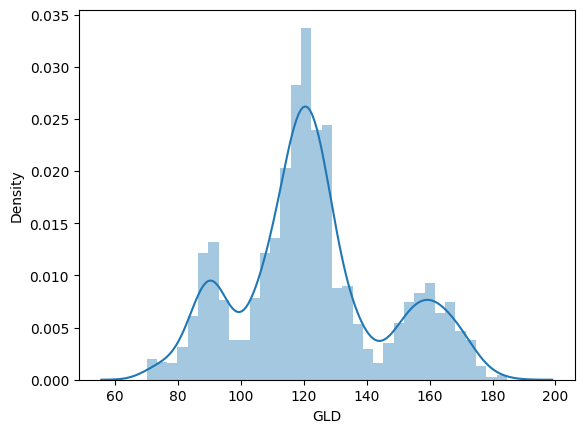

In [23]:
sns.distplot(y)

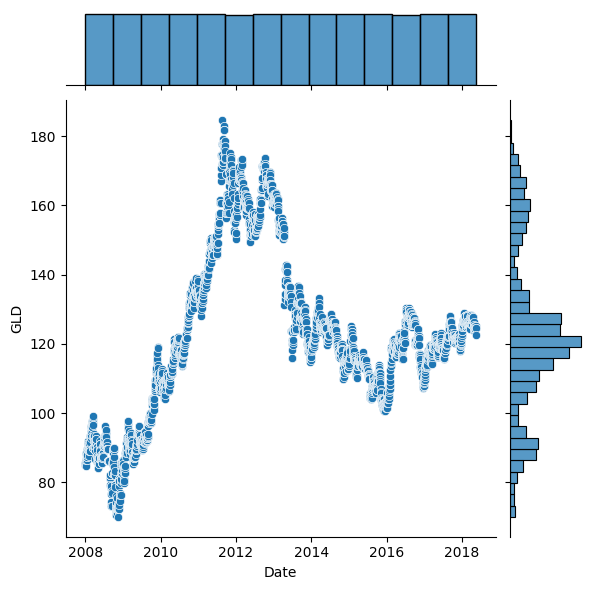

In [24]:
sns.jointplot(x=df.index, y=y, data=df)

Text(0.5, 1.0, 'Lag Plot with Lag=1')

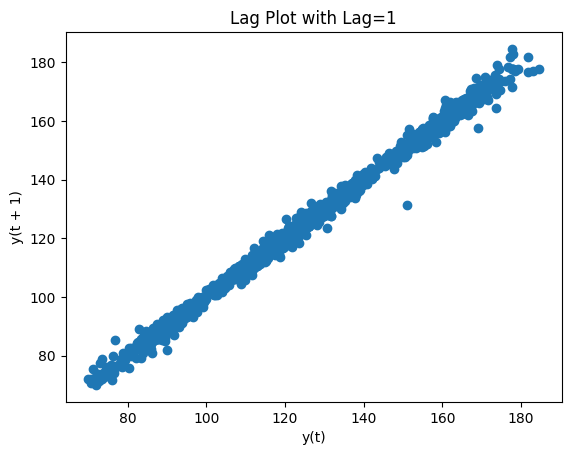

In [25]:
plt.figure()
pd.plotting.lag_plot(y, lag=1)
plt.title('Lag Plot with Lag=1')

Text(0.5, 1.0, 'Yearly Gold Price Distribution')

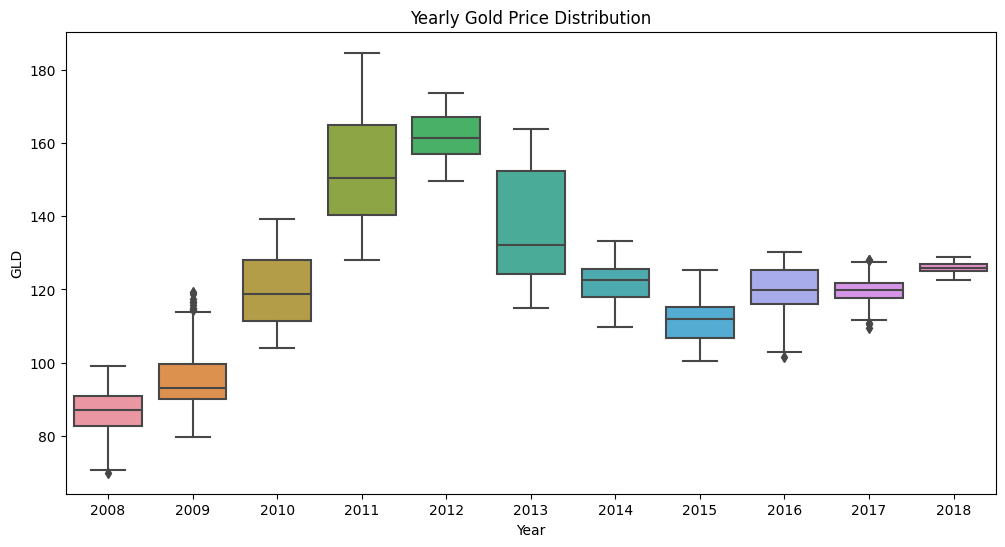

In [26]:
df['Year'] = df.index.year

plt.figure(figsize=(12,6))
sns.boxplot(x='Year', y=y, data=df)
plt.title('Yearly Gold Price Distribution')

In [27]:
df = df.drop('Year', axis=1)

In [28]:
df.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

Text(0.5, 1.0, 'Autocorrelation of GLD')

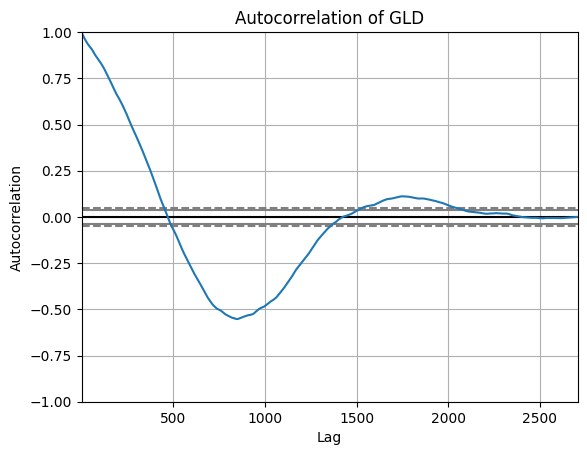

In [29]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(y)
plt.title('Autocorrelation of GLD')

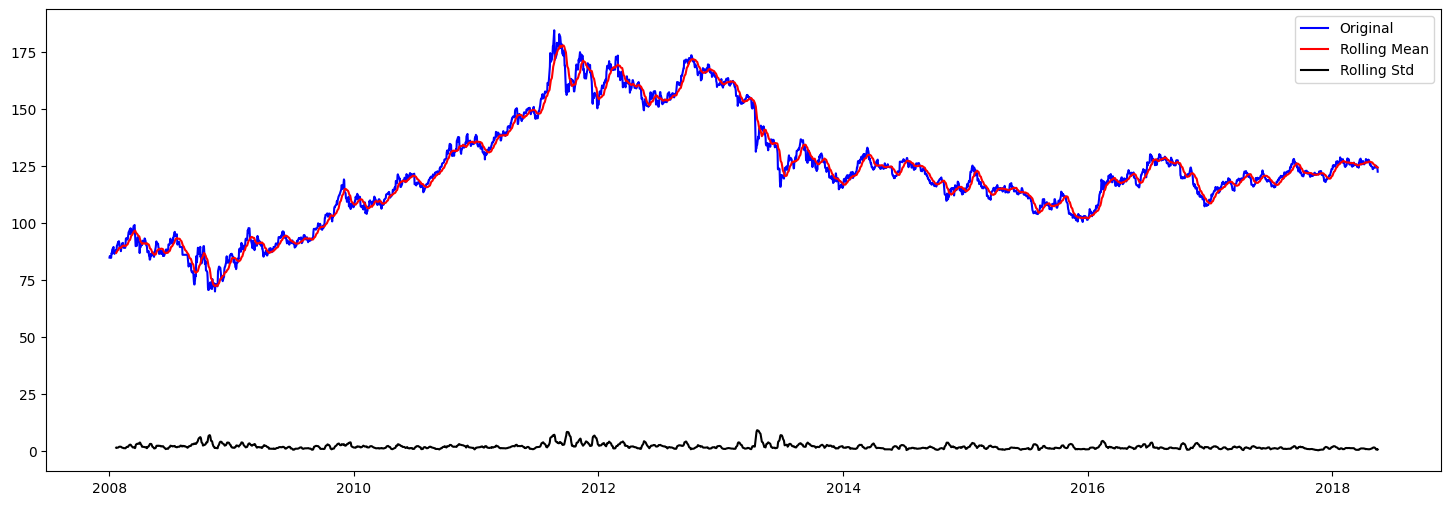

In [30]:
plt.figure(figsize=(18,6))
rolling_mean = y.rolling(window=15).mean()
rolling_std = y.rolling(window=15).std()
plt.plot(y, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')

### 6. ETS decomposition

In [31]:
df_og = df

In [32]:
df = df[['GLD']]

In [33]:
df.head()

,GLD
Date,
2008-01-02,84.860001
2008-01-03,85.570000
2008-01-04,85.129997
2008-01-07,84.769997
2008-01-08,86.779999


In [34]:
df.isna().sum()

GLD    0
dtype: int64

In [35]:
df = df.asfreq('B')

In [36]:
df.index

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
               '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11',
               '2008-01-14', '2008-01-15',
               ...
               '2018-05-03', '2018-05-04', '2018-05-07', '2018-05-08',
               '2018-05-09', '2018-05-10', '2018-05-11', '2018-05-14',
               '2018-05-15', '2018-05-16'],
              dtype='datetime64[ns]', name='Date', length=2706, freq='B')

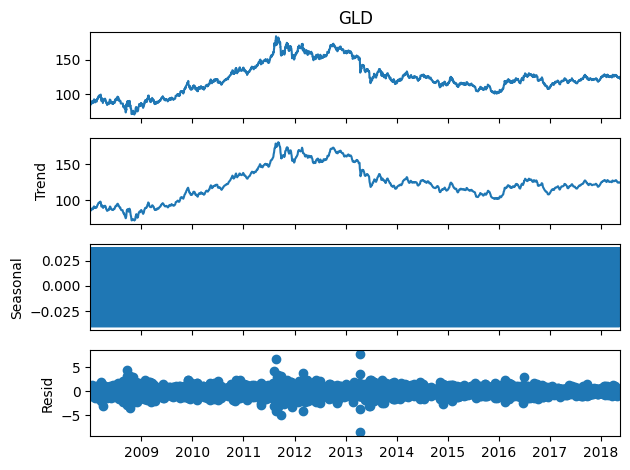

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed_add = seasonal_decompose(df['GLD'], model="add")

decomposed_add.plot();

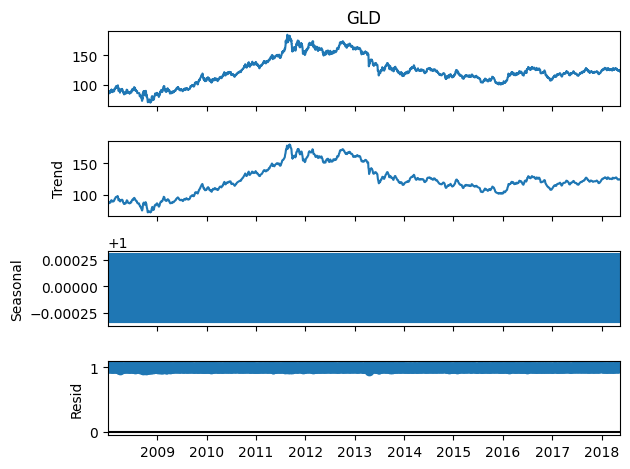

In [38]:
decomposed_mult = seasonal_decompose(df['GLD'], model="mult")

decomposed_mult.plot();

### 7. Tests for stationarity

In [39]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [40]:
adf_test(df['GLD'], 'Gold Price from 2008 to 2018')

Augmented Dickey-Fuller Test: Gold Price from 2008 to 2018
ADF test statistic        -1.938701
p-value                    0.314079
# lags used                1.000000
# observations          2704.000000
critical value (1%)       -3.432771
critical value (5%)       -2.862609
critical value (10%)      -2.567339
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [41]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(df['GLD'], regression='c')

statistic, p_value, n_lags, critical_values = kpss_test

print(f'KPSS Statistic: {statistic}')
print(f'P-Value: {p_value}')
print(f'Number of Lags Used: {n_lags}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key} : {value}')

alpha = 0.05
if p_value > alpha:
    print('The null hypothesis cannot be rejected (The series is stationary)')
else:
    print('The null hypothesis can be rejected (The series is not stationary)')

KPSS Statistic: 1.6843805975562773
P-Value: 0.01
Number of Lags Used: 31
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
The null hypothesis can be rejected (The series is not stationary)


C:\Users\fmiranda\AppData\Local\Temp\ipykernel_26012\638676557.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(df['GLD'], regression='c')


In [42]:
from arch.unitroot import PhillipsPerron

pp_test = PhillipsPerron(df['GLD'])

print(pp_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.909
P-value                         0.328
Lags                               28
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [43]:
df_diff = df.diff()

In [44]:
df_diff.head()

,GLD
Date,
2008-01-02,NaN
2008-01-03,0.709999
2008-01-04,-0.440003
2008-01-07,-0.360000
2008-01-08,2.010002


In [45]:
adf_test(df_diff['GLD'], 'Gold Price from 2008 to 2018')

Augmented Dickey-Fuller Test: Gold Price from 2008 to 2018
ADF test statistic       -53.919346
p-value                    0.000000
# lags used                0.000000
# observations          2704.000000
critical value (1%)       -3.432771
critical value (5%)       -2.862609
critical value (10%)      -2.567339
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [46]:
kpss_test = kpss(df_diff['GLD'].dropna(), regression='c')

statistic, p_value, n_lags, critical_values = kpss_test

print(f'KPSS Statistic: {statistic}')
print(f'P-Value: {p_value}')
print(f'Number of Lags Used: {n_lags}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key} : {value}')

alpha = 0.05
if p_value > alpha:
    print('The null hypothesis cannot be rejected (The series is stationary)')
else:
    print('The null hypothesis can be rejected (The series is not stationary)')

KPSS Statistic: 0.1784442767648993
P-Value: 0.1
Number of Lags Used: 5
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
The null hypothesis cannot be rejected (The series is stationary)


C:\Users\fmiranda\AppData\Local\Temp\ipykernel_26012\3323416193.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(df_diff['GLD'].dropna(), regression='c')


In [47]:
pp_test = PhillipsPerron(df_diff['GLD'].dropna())

print(pp_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -54.129
P-value                         0.000
Lags                               28
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [48]:
df_gld = df

In [49]:
df = df_diff

### 8. ACF and PACF plots

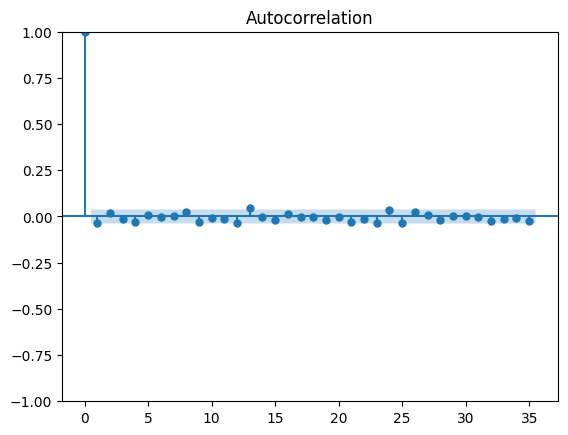

In [50]:
plot_acf(df['GLD'].dropna());

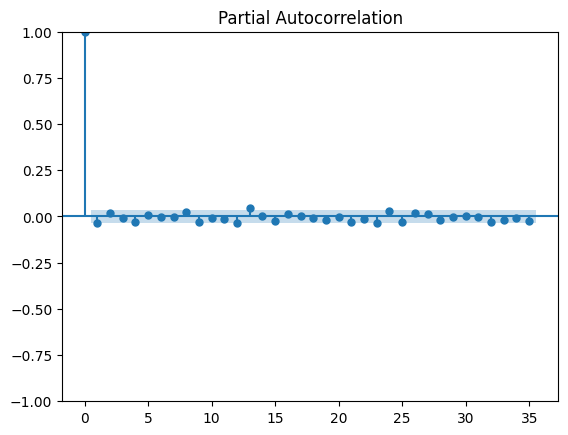

In [51]:
plot_pacf(df['GLD'].dropna());

### 9. Determine ARIMA orders

In [52]:
df = df.dropna()

In [53]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

model_auto = auto_arima(df['GLD'], trace=True, seasonal=False,
                        error_action='ignore', suppress_warnings=True, stepwise=True)

model_auto.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=9553.296, Time=0.94 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9560.268, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=9558.605, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=9558.739, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=9561.535, Time=0.32 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=9561.573, Time=0.40 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=9559.083, Time=1.51 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=9559.444, Time=1.45 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=9559.802, Time=0.40 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=9560.839, Time=0.72 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=9560.905, Time=0.67 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=9554.772, Time=1.44 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=9555.027, Time=1.99 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 10.085 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2705
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -4771.648
Date:                Sun, 04 Jun 2023   AIC                           9553.296
Time:                        22:12:35   BIC                           9582.811
Sample:                    01-03-2008   HQIC                          9563.969
                         - 05-16-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2987      0.034    -38.373      0.000      -1.365      -1.232
ar.L2         -0.9317      0.031    -29.626      0.000      -0.993      -0.870
ma.L1          1.2728      0.036     35.360      0.000       1.202       1.343
ma.L2          0.9198      0.035     26.460      0.000       0.852       0.988
sigma2         1.9939      0.017    115.943      0.000       1.960       2.028
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):             41929.02
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                            -1.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
print(model_auto.order)

(2, 0, 2)


### 10. Split dataset

In [55]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

### 11. Train the model, and extract predictions

In [56]:
model = ARIMA(train_data, order=(2,0,2))
model_fit = model.fit()

In [57]:
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1, dynamic=False)

In [58]:
predictions_inv = df_gld['GLD'].iloc[train_data.shape[0]-1] + predictions.cumsum()

### 12. Visualize predictions

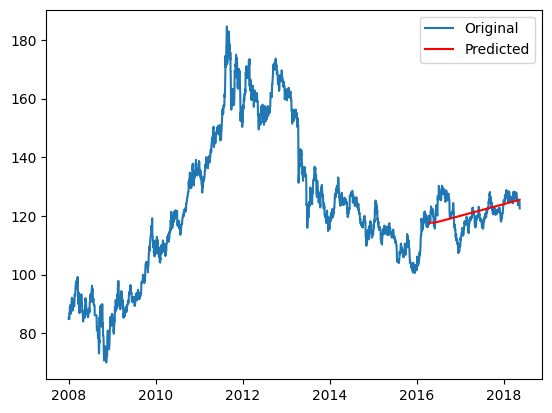

In [59]:
plt.plot(df_gld['GLD'], label='Original')
plt.plot(predictions_inv, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

### 13. Evaluate model performance

In [60]:
print('Mean Absolute Error:', mean_absolute_error(test_data['GLD'], predictions))
print('Mean Squared Error:', mean_squared_error(test_data['GLD'], predictions))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(test_data['GLD'], predictions)))
# For MAPE and SMAPE, you might need to define functions or install library like 'pyMape' if available
print('AIC:', model_fit.aic)
print('BIC:', model_fit.bic)

Mean Absolute Error: 0.6130195764726284
Mean Squared Error: 0.8156897906054994
Root Mean Squared Error: 0.9031554631432506
AIC: 7951.697420218352
BIC: 7985.77570205815


### 14. Check different ARIMA parameters

In [64]:
p_values = range(0,11)
d_values = range(0,1)
q_values = range(0,11)
aic_dict = {}

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(train_data['GLD'], order=(p, d, q))
                model_fit = model.fit()
                aic_dict[(p, d, q)] = model_fit.aic
                print('p={}, d={}, q={} => AIC:{}'.format(p, d, q, model_fit.aic))
            except:
                continue

p=0, d=0, q=0 => AIC:7949.619775562853
p=0, d=0, q=1 => AIC:7948.5848993225645
p=0, d=0, q=2 => AIC:7949.846537674972
p=0, d=0, q=3 => AIC:7950.300847901871
p=0, d=0, q=4 => AIC:7950.891381645957
p=0, d=0, q=5 => AIC:7952.642427860621
p=0, d=0, q=6 => AIC:7954.311553161182
p=0, d=0, q=7 => AIC:7956.256899399453
p=0, d=0, q=8 => AIC:7957.055994728389
p=0, d=0, q=9 => AIC:7958.062350237442
p=0, d=0, q=10 => AIC:7960.049932011689
p=1, d=0, q=0 => AIC:7948.4743404194205
p=1, d=0, q=1 => AIC:7949.616601909595
p=1, d=0, q=2 => AIC:7951.472388615251
p=1, d=0, q=3 => AIC:7951.504265999433
p=1, d=0, q=4 => AIC:7952.533918274603
p=1, d=0, q=5 => AIC:7954.5096173838165
p=1, d=0, q=6 => AIC:7956.621436232383
p=1, d=0, q=7 => AIC:7958.073814505843
p=1, d=0, q=8 => AIC:7958.504569599271
p=1, d=0, q=9 => AIC:7958.563006967885
p=1, d=0, q=10 => AIC:7961.5040019289245
p=2, d=0, q=0 => AIC:7949.742546910441
p=2, d=0, q=1 => AIC:7951.493957860546
p=2, d=0, q=2 => AIC:7951.697420218352
p=2, d=0, q=3 => AI

In [65]:
best_pdq = min(aic_dict, key=aic_dict.get)
print('Best ARIMA parameters p={}, d={}, q={} => AIC:{}'.format(best_pdq[0], best_pdq[1], best_pdq[2], aic_dict[best_pdq]))

Best ARIMA parameters p=3, d=0, q=3 => AIC:7946.711142139222


In [66]:
new_model = ARIMA(train_data, order=(3,0,3))
new_model_fit = new_model.fit()

In [67]:
new_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1, dynamic=False)

In [68]:
new_predictions_inv = df_gld['GLD'].iloc[train_data.shape[0]-1] + new_predictions.cumsum()

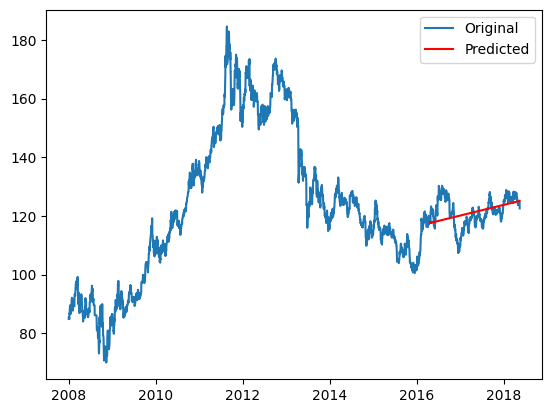

In [69]:
plt.plot(df_gld['GLD'], label='Original')
plt.plot(new_predictions_inv, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [70]:
pd.set_option('display.float_format', '{:.4f}'.format)
new_predictions_inv

2016-04-20   117.8107
2016-04-21   117.7226
2016-04-22   117.7372
2016-04-25   117.6322
2016-04-26   117.6531
               ...   
2018-05-10   125.0398
2018-05-11   125.0537
2018-05-14   125.0677
2018-05-15   125.0817
2018-05-16   125.0957
Freq: B, Name: predicted_mean, Length: 541, dtype: float64

In [71]:
df_gld[-541:]

,GLD
Date,
2016-04-20,118.9700
2016-04-21,119.4200
2016-04-22,119.4200
2016-04-25,118.2300
2016-04-26,118.7000
...,...
2018-05-10,125.1800
2018-05-11,125.1800
2018-05-14,124.4900


In [72]:
df_gld['Preds'] = new_predictions_inv

In [73]:
df_gld[-541:]

,GLD,Preds
Date,,
2016-04-20,118.9700,117.8107
2016-04-21,119.4200,117.7226
2016-04-22,119.4200,117.7372
2016-04-25,118.2300,117.6322
2016-04-26,118.7000,117.6531
...,...,...
2018-05-10,125.1800,125.0398
2018-05-11,125.1800,125.0537
2018-05-14,124.4900,125.0677


In [74]:
print('Mean Absolute Error:', mean_absolute_error(test_data['GLD'], new_predictions))
print('Mean Squared Error:', mean_squared_error(test_data['GLD'], new_predictions))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(test_data['GLD'], new_predictions)))
print('AIC:', new_model_fit.aic)
print('BIC:', new_model_fit.bic)

Mean Absolute Error: 0.6132643606195404
Mean Squared Error: 0.8151803693910291
Root Mean Squared Error: 0.9028733961032571
AIC: 7946.711142139222
BIC: 7992.148851258953


### 15. Check residuals

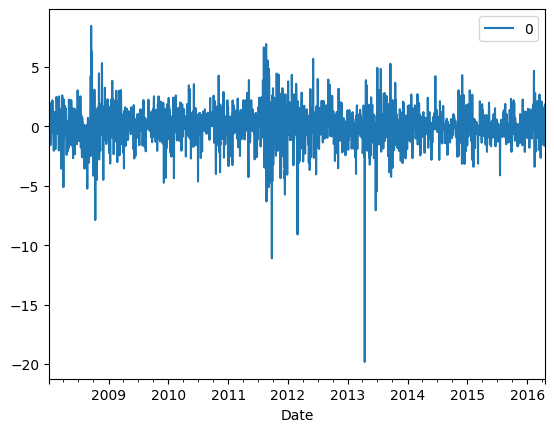

In [75]:
residuals = pd.DataFrame(new_model_fit.resid)
residuals.plot();

### 16. Model diagnostics

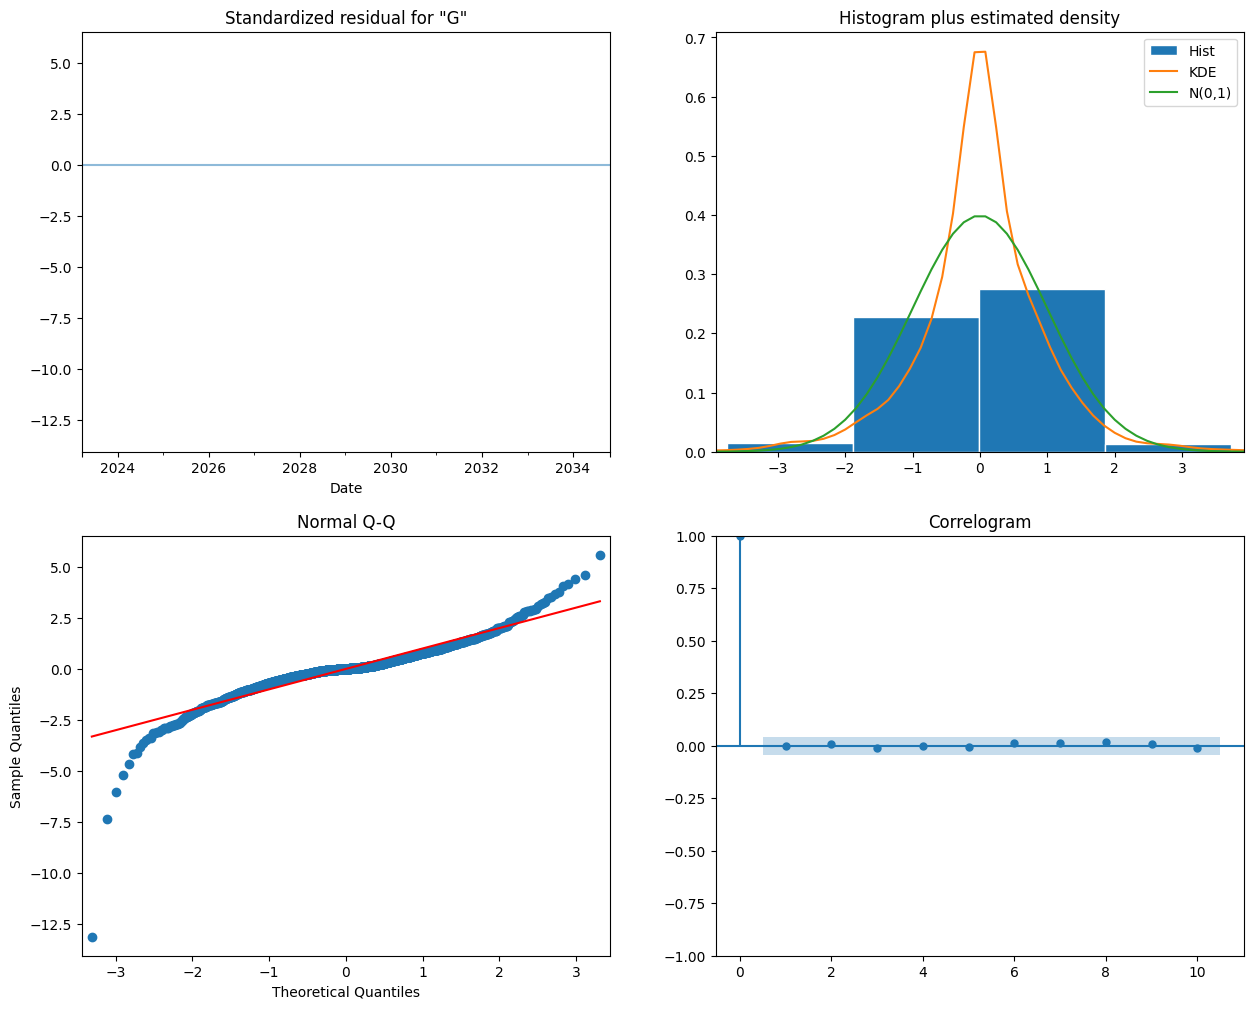

In [77]:
new_model_fit.plot_diagnostics(figsize=(15, 12));

### 17. Forecast into the future

In [78]:
forecast = new_model_fit.forecast(steps=10)
print(forecast)

2016-04-20    0.0014
2016-04-21   -0.0670
2016-04-22    0.0242
2016-04-25   -0.0251
2016-04-26   -0.0413
2016-04-27    0.0298
2016-04-28   -0.0428
2016-04-29   -0.0110
2016-05-02    0.0190
2016-05-03   -0.0457
Freq: B, Name: predicted_mean, dtype: float64


In [79]:
forecast_inv = df_gld['GLD'].iloc[train_data.shape[0]-1] + forecast.cumsum()

In [80]:
forecast_inv

2016-04-20   117.7414
2016-04-21   117.6744
2016-04-22   117.6986
2016-04-25   117.6735
2016-04-26   117.6322
2016-04-27   117.6620
2016-04-28   117.6192
2016-04-29   117.6082
2016-05-02   117.6272
2016-05-03   117.5816
Freq: B, Name: predicted_mean, dtype: float64